<a href="https://colab.research.google.com/github/sudeepbhagat11/ML-LAB-102217257/blob/main/ML_Assignmenet_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Find frequent patterns by implementing Apriori algorithm by using varying values of
minimum support count on the dataset available at the following link
https://www.philippe-fournier-viger.com/spmf/datasets/retail.txt

  Note: Whole or some part of dataset can be used.

In [ ]:
from google.colab import files

In [ ]:
import pandas as pd

# Load the file line by line into a list of lists
file_path = '/content/retail.txt'
with open(file_path, 'r') as file:
    data = [line.strip().split() for line in file]

# Convert to DataFrame and fill NaN for missing values in rows
df = pd.DataFrame(data)
df.to_csv('/content/retail.csv', index=False, header=False)
print("File saved as retail.csv")


File saved as retail.csv


In [ ]:
df=pd.read_csv('/content/retail.csv')

In [ ]:
!pip install mlxtend

In [ ]:
transactions = df.applymap(str).values.tolist()

<ipython-input-3-59017fede084>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = df.applymap(str).values.tolist()


In [ ]:
df.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


88161

In [ ]:
from mlxtend.preprocessing import TransactionEncoder


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)


In [ ]:
one_hot_df.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


88161

In [ ]:
from mlxtend.frequent_patterns import apriori


min_support = 0.01
frequent_itemsets = apriori(one_hot_df, min_support=min_support, use_colnames=True)



Frequent Itemsets:
      support                       itemsets
0    0.014916                           (10)
1    0.012386                       (1005.0)
2    0.023321                        (102.0)
3    0.010004                      (10516.0)
4    0.031420                        (111.0)
..        ...                            ...
290  0.011808        (nan, 49.0, 40.0, 90.0)
291  0.012194    (33, 49.0, nan, 39.0, 40.0)
292  0.015687    (33, 49.0, 42.0, nan, 40.0)
293  0.011229    (49.0, 42.0, nan, 39, 40.0)
294  0.011354  (49.0, 42.0, nan, 39.0, 40.0)

[295 rows x 2 columns]


In [ ]:
frequent_itemsets.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


295

In [ ]:
from mlxtend.frequent_patterns import association_rules
num_itemsets = frequent_itemsets['itemsets'].nunique()

min_confidence = 0.5
rules = association_rules(frequent_itemsets,num_itemsets=num_itemsets, metric="confidence", min_threshold=min_confidence)


print("Association Rules:")
print(rules)


Association Rules:
                 antecedents        consequents  antecedent support  \
0                       (10)              (nan)            0.014916   
1                   (1005.0)              (nan)            0.012386   
2                    (102.0)             (49.0)            0.023321   
3                    (102.0)              (nan)            0.023321   
4                  (10516.0)              (nan)            0.010004   
..                       ...                ...                 ...   
358  (42.0, 39.0, nan, 40.0)             (49.0)            0.016629   
359       (42.0, 39.0, 49.0)        (nan, 40.0)            0.013328   
360        (42.0, 39.0, nan)       (49.0, 40.0)            0.020848   
361       (42.0, 39.0, 40.0)        (nan, 49.0)            0.016629   
362             (42.0, 39.0)  (nan, 49.0, 40.0)            0.020848   

     consequent support   support  confidence      lift  representativity  \
0              0.999989  0.014905    0.999240  0.99

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install --upgrade mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2. Find associations rules by using varying values of minimum confidence values on the
dataset available at the above mentioned link.

3. Also plot the number of frequent patterns and association rules generated using
different values of minimum support count and minimum confidence level,
respectively, with the help of Matplotlib library.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


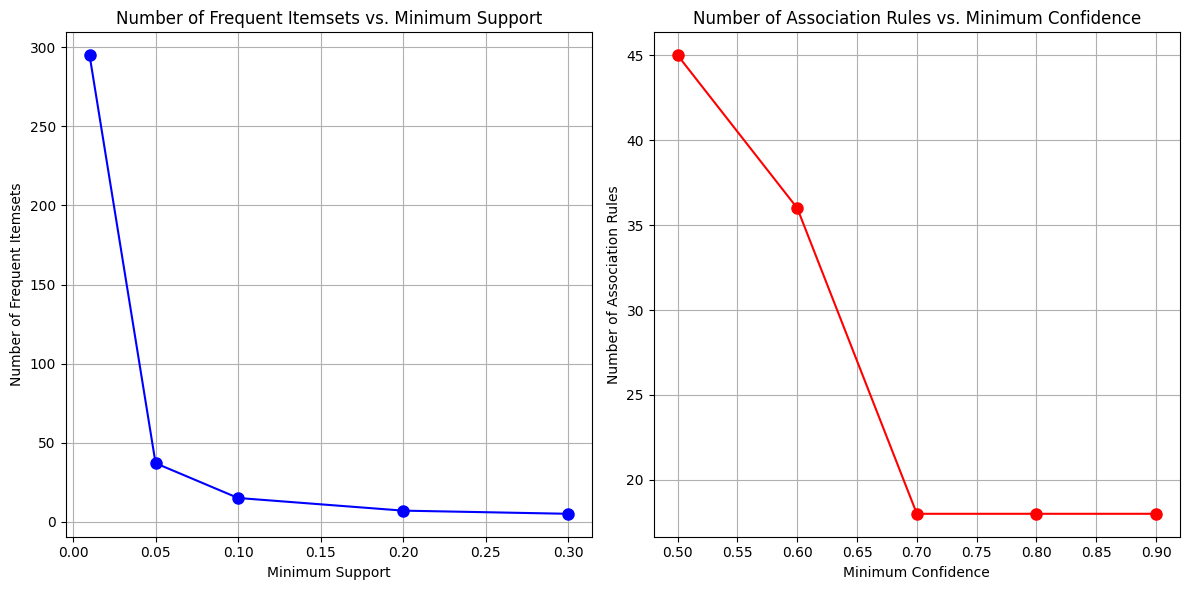

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Assuming 'one_hot_df' is your one-hot encoded transaction DataFrame

# List of minimum support values to test
support_thresholds = [0.01, 0.05, 0.1, 0.2, 0.3]
# List of minimum confidence values to test
confidence_thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize lists to store the number of frequent itemsets and association rules
num_frequent_itemsets = []
num_association_rules = []

# Loop over support thresholds and count the number of frequent itemsets
for support in support_thresholds:
    frequent_itemsets = apriori(one_hot_df, min_support=support, use_colnames=True)
    num_frequent_itemsets.append(len(frequent_itemsets))

# Loop over confidence thresholds and count the number of association rules
for confidence in confidence_thresholds:
    # First, find frequent itemsets with a minimum support threshold
    frequent_itemsets = apriori(one_hot_df, min_support=0.05, use_colnames=True)
    num_itemsets = frequent_itemsets['itemsets'].nunique()
    # Generate association rules with the current confidence threshold
    rules = association_rules(frequent_itemsets,num_itemsets=num_itemsets, metric="confidence", min_threshold=confidence)
    num_association_rules.append(len(rules))

# Plotting the number of frequent itemsets vs. minimum support
plt.figure(figsize=(12, 6))

# Plot for frequent itemsets
plt.subplot(1, 2, 1)
plt.plot(support_thresholds, num_frequent_itemsets, marker='o', color='b', linestyle='-', markersize=8)
plt.title('Number of Frequent Itemsets vs. Minimum Support')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Itemsets')
plt.grid(True)

# Plot for association rules
plt.subplot(1, 2, 2)
plt.plot(confidence_thresholds, num_association_rules, marker='o', color='r', linestyle='-', markersize=8)
plt.title('Number of Association Rules vs. Minimum Confidence')
plt.xlabel('Minimum Confidence')
plt.ylabel('Number of Association Rules')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
